# Clustering Project

Features:
- CustomerID
- Gender
- Age
- Annual Income
- Spending Score

# K-Means Clustering
### Importing needed packages

In [575]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 

In [576]:
df = pd.read_csv("Customer.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [577]:
from sklearn.preprocessing import StandardScaler
X = df.copy()
X["Gender"]= X["Gender"].map({"Male":0,"Female":1})
X = X.values[:,1:] # deleting the Customer ID column as it is not relevant for customer segmentation
X = np.nan_to_num(X)

In [578]:
Clus_dataSet = StandardScaler().fit_transform(X)

To find the best value for K, clustering process is done for different values of K and plotted.

In [579]:
labels = []
distortions = []
for clusterNum in range(1,10):
    k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
    k_means.fit(Clus_dataSet)
    labels.append(k_means.labels_)
    distortions.append(k_means.inertia_)

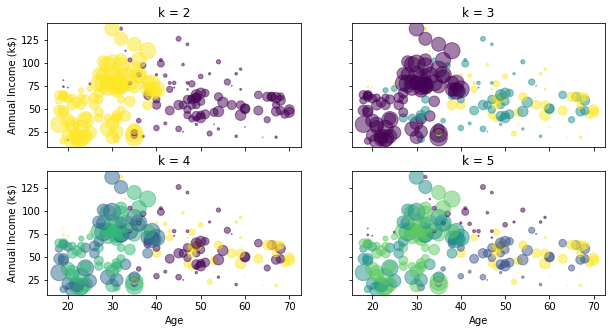

In [580]:
from matplotlib.pyplot import figure
area = np.pi * ( X[:, 3])**2 /100

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(10, 5)
axs[0, 0].scatter(X[:, 1], X[:, 2], s=area, c=labels[1].astype(np.float), alpha=0.5)
axs[0, 0].set_title('k = 2')
axs[0, 1].scatter(X[:, 1], X[:, 2], s=area, c=labels[2].astype(np.float), alpha=0.5)
axs[0, 1].set_title('k = 3')
axs[1, 0].scatter(X[:, 1], X[:, 2], s=area, c=labels[3].astype(np.float), alpha=0.5)
axs[1, 0].set_title('k = 4')
axs[1, 1].scatter(X[:, 1], X[:, 2], s=area, c=labels[4].astype(np.float), alpha=0.5)
axs[1, 1].set_title('k = 5')

for ax in axs.flat:
    ax.set(xlabel='Age', ylabel='Annual Income (k$)')

for ax in axs.flat:
    ax.label_outer()

In the following, the elbow method is used to find the optimal k value.

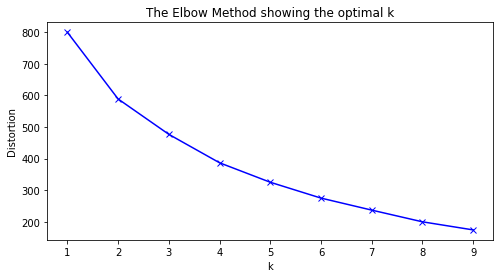

In [581]:
plt.figure(figsize=(8,4))
plt.plot(range(1,10), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [582]:
df["Clus_km"] = labels[2] 
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_km
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,1


In [583]:
df.groupby('Clus_km').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Clus_km,,,,
0,104.364706,28.047059,61.788235,72.882353
1,92.560606,45.075758,57.727273,36.181818
2,104.489796,49.204082,62.244898,29.734694


# Density-Based Clustering

In [584]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler 

In [585]:
X = StandardScaler().fit_transform(X)

To find the optimum value of epsilon, DMBSCAN algorithm is implemented. doi.org/10.1088/1755-1315/31/1/012012

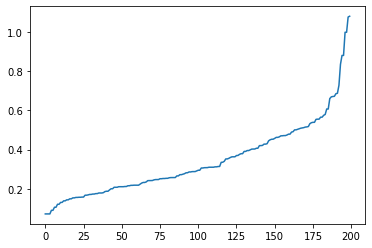

In [586]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

According to the graph above, the critical change in curves accures around 0.7. Thus, value of 0.7 is considered for epsilon.

In [587]:
epsilon = 0.7
minimumSamples = 5
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_

In [588]:
# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

In [589]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

7

In [590]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2, 3, 4, 5, 6}

In [591]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))


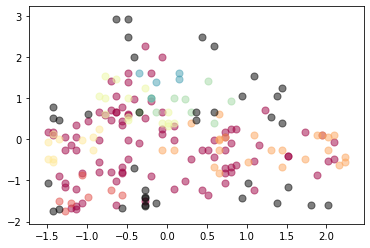

In [592]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 1], xy[:, 2],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 1], xy[:, 2],s=50, c=[col], marker=u'o', alpha=0.5)

# Hierarchical Clustering - Agglomerative

In [593]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from sklearn.cluster import AgglomerativeClustering 

In [594]:
X = df.copy()
X["Gender"]= X["Gender"].map({"Male":0,"Female":1})
X = np.nan_to_num(X)

In [595]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(X)

In [596]:
import scipy
leng = feature_mtx.shape[0]
D = np.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

In [597]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

D:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


In [598]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')

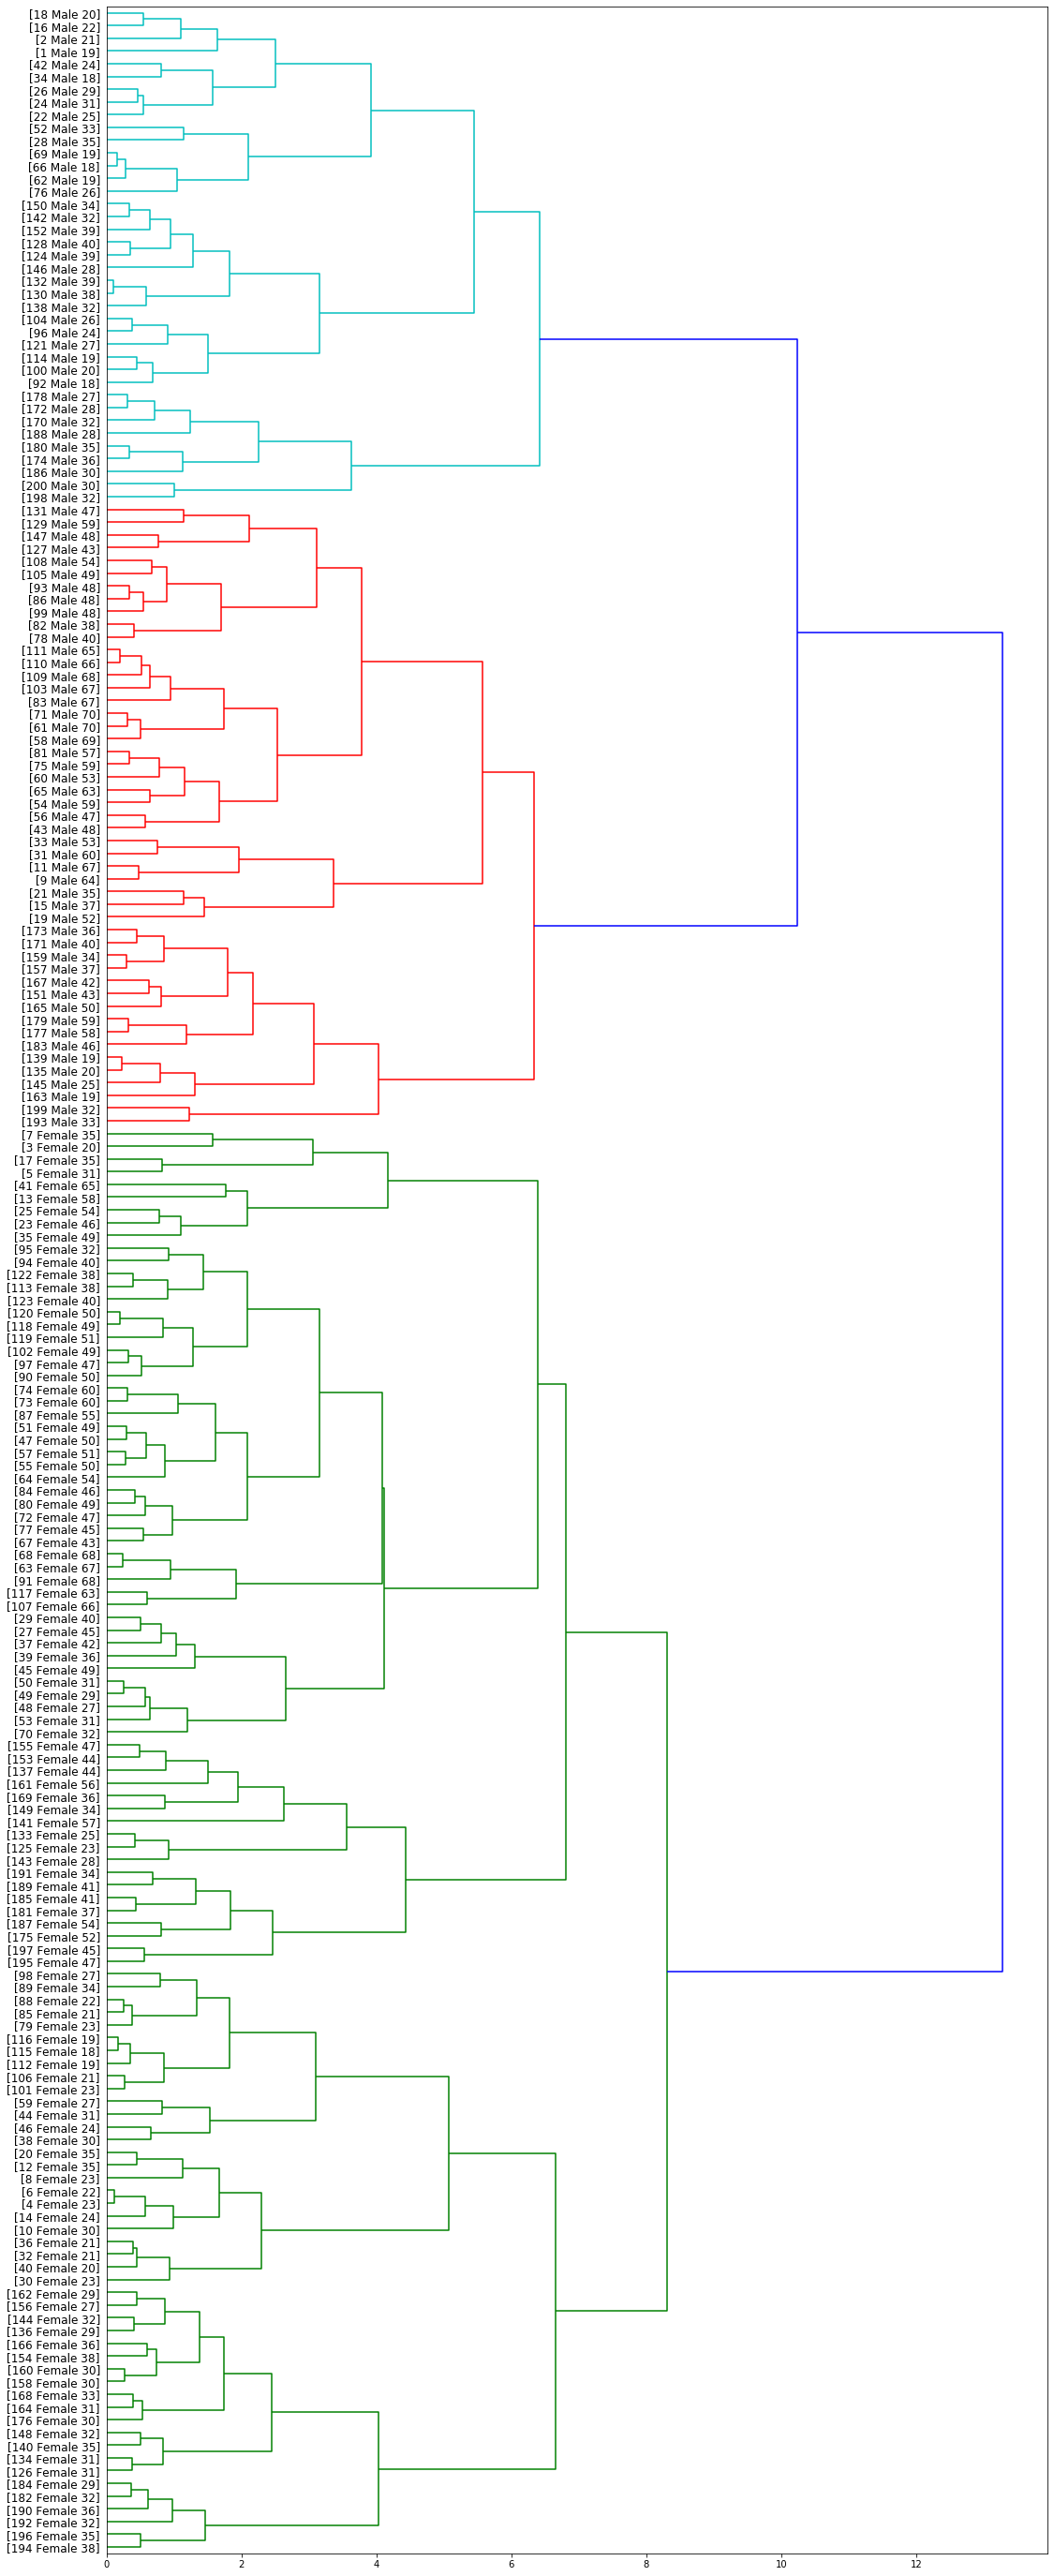

In [599]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df['CustomerID'][id], df['Gender'][id], int(float(df['Age'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')